<a href="https://colab.research.google.com/github/tishitagoel/RBC/blob/main/macro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RBC CLASSIFICATION USING CNN ALGORITHM**

IMPORTING LIBRARIES AND MODULES

In [49]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
#from keras import backend as K

In [50]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join


SETTING UP DIRECTORIES

In [51]:
img_width = 150
img_height = 150

train_data_dir = '/content/drive/MyDrive/RBC/Macrocyte_Class/training_aug'
validation_data_dir = '/content/drive/MyDrive/RBC/Macrocyte_Class/validation_aug'
train_samples = 345
validation_samples = 51
epochs = 90
batch_size = 16


input_shape = (img_width, img_height, 3)


INITIALISING THE MODEL

In [52]:
SIZE = 150

INPUT_SHAPE = (SIZE, SIZE, 3)
from keras.layers import BatchNormalization
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.8))

model.add(Flatten()) 
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid')) #used for binary classification

In [53]:
import tensorflow as tf
import keras
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer='Adam', 
              metrics=['accuracy'])
print(model.summary())   

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_10 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_11 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)       

In [54]:
batch_size = 16


train_datagen = ImageDataGenerator(
        rescale=1./255,
       # rotation_range=45,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [55]:
# augmentation configuration
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [56]:
train_generator = train_datagen.flow_from_directory(
        train_data_dir,  # this is the input directory
        target_size=(150, 150),  # all images will be resized to 64x64
        batch_size=batch_size,
        class_mode='binary') 

Found 345 images belonging to 2 classes.


In [57]:
print(train_generator.class_indices)


{'macrocyte': 0, 'normal': 1}


In [58]:
imgs, labels = next(train_generator)

In [59]:
input_shape = (150,150,3)

In [60]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

16
1.0


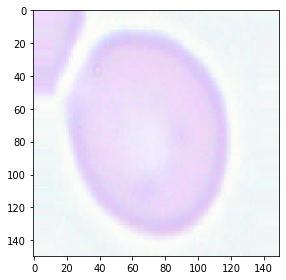

1.0


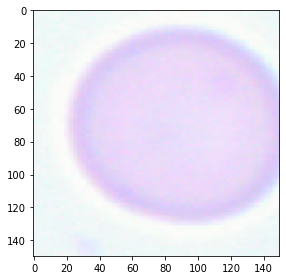

0.0


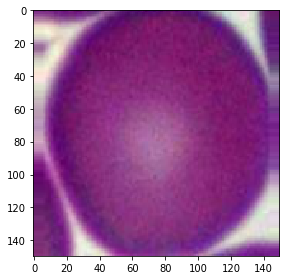

0.0


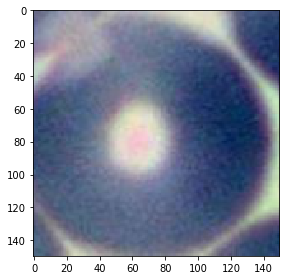

1.0


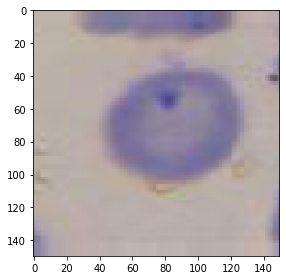

1.0


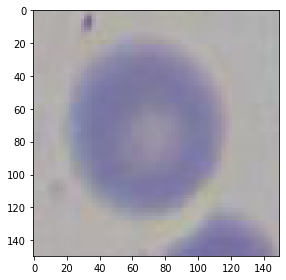

0.0


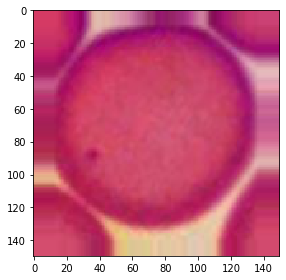

0.0


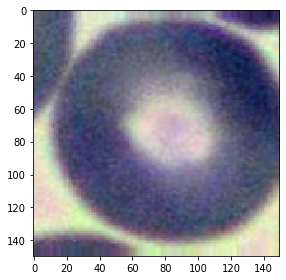

0.0


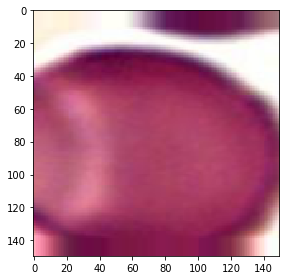

1.0


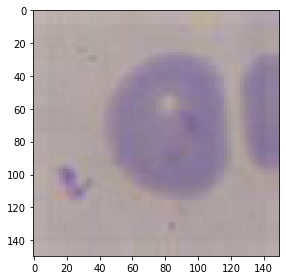

0.0


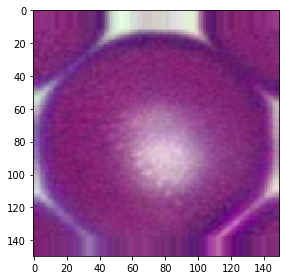

0.0


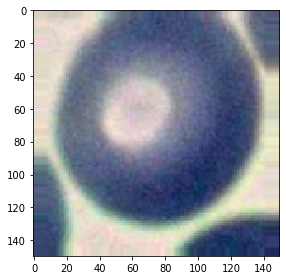

1.0


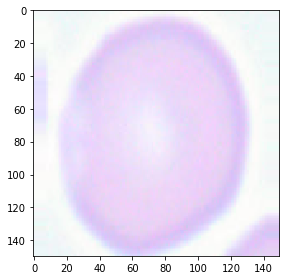

0.0


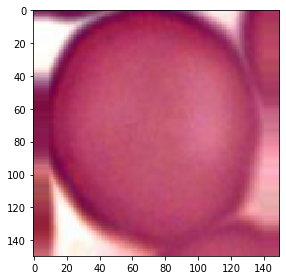

1.0


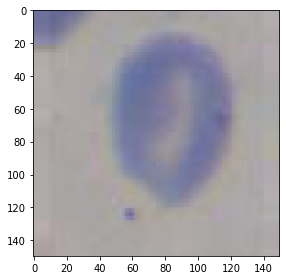

1.0


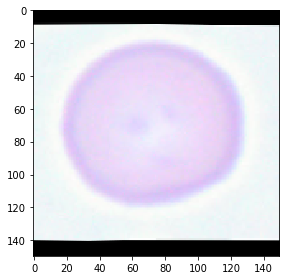

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [62]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 51 images belonging to 2 classes.


TRAINING THE MODEL

In [70]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=345 // 16,
    epochs= 90,
    validation_data=validation_generator,
    validation_steps=51 // 16)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/90
21/21 [==============================] - 12s 567ms/step - loss: 0.0220 - accuracy: 0.9909 - val_loss: 0.0430 - val_accuracy: 0.9792
Epoch 2/90
21/21 [==============================] - 12s 563ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.0870 - val_accuracy: 0.9792
Epoch 3/90
21/21 [==============================] - 12s 562ms/step - loss: 0.0139 - accuracy: 0.9970 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 4/90
21/21 [==============================] - 12s 573ms/step - loss: 0.0399 - accuracy: 0.9909 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 5/90
21/21 [==============================] - 12s 567ms/step - loss: 0.0130 - accuracy: 0.9970 - val_loss: 0.0831 - val_accuracy: 0.9792
Epoch 6/90
21/21 [==============================] - 12s 568ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.1122 - val_accuracy: 0.9167
Epoch 7/90
21/21 [==============================] - 12s 554ms/step - loss: 0.0067 - accuracy: 0.9970 - val_loss: 0.0326 - val_accuracy: 0.9792

In [75]:
y = model.save_weights('RBC_one.h5')

In [76]:
x = history.history['accuracy']
best_accuracy = max(x)
best_accuracy

1.0


FINAL ACCURACIES

In [77]:
z = history.history['accuracy'][-1]

In [78]:
print('accuracy obtained =',z*100)

accuracy obtained = 99.6960461139679



PLOTTING THE MODEL ACCURACY AND LOSS

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


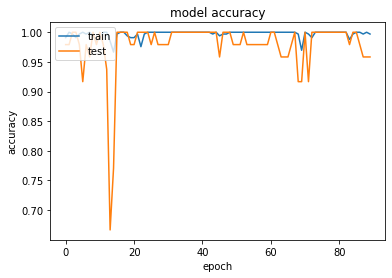

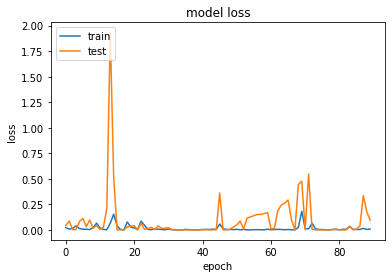

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

print(history.history.keys())

# summarizing the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarizing the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()